# An implementation of linear regression for one variable using numpy.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
X_data = df[['year']].values
y_data = df['per capita income (US$)'].values
df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


y = theta1*x + theta0

In [3]:
# preparing test and train data
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [4]:
def init_params():
    m = len(y)
    theta0 = 0.0
    theta1 = 0.0
    return theta0, theta1, m

Iteration 0, Cost: 0.9646228982377573
Iteration 1000, Cost: 0.10663884438780821
Iteration 2000, Cost: 0.1066388443878082
Iteration 3000, Cost: 0.1066388443878082
Iteration 4000, Cost: 0.1066388443878082
Iteration 5000, Cost: 0.1066388443878082
Iteration 6000, Cost: 0.10663884438780817
Iteration 7000, Cost: 0.1066388443878082
Iteration 8000, Cost: 0.1066388443878082
Iteration 9000, Cost: 0.1066388443878082
Scaled parameters: theta0 = 4.052854148379176e-15, theta1 = 0.9451778433777352
Original scale parameters: theta0 = -1605560.1987964201, theta1 = 815.1425130089472
Final cost: 0.1066388443878082
Mean Squared Error on Test Data: 3.770598590021806e+20


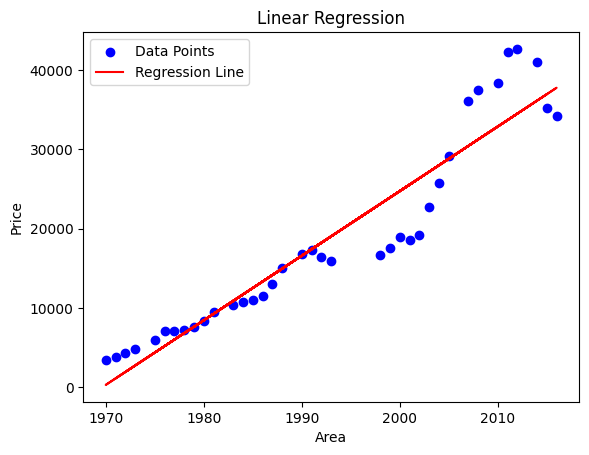

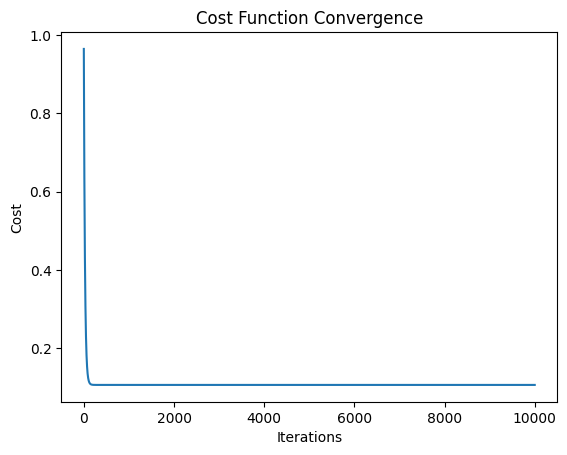

In [5]:
def predict_price(X, theta0, theta1):
    return theta0 + theta1 * X.flatten()  # Fixed: X should be flattened here

def compute_cost(X, y, theta0, theta1):
    m = len(y)
    predictions = predict_price(X, theta0, theta1)
    cost = (1 / (m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta0, theta1, alpha, iterations):
    m = len(y)
    cost_history = []
    X_flat = X.flatten()  # Flatten once outside the loop
    
    for i in range(iterations):
        predictions = theta0 + theta1 * X_flat
        
        # Calculate gradients
        d_theta0 = - (2/m) * np.sum(predictions - y)
        d_theta1 = - (2/m) * np.sum((predictions - y) * X_flat)
        
        # Update parameters
        theta0 = theta0 + alpha * d_theta0
        theta1 = theta1 + alpha * d_theta1
        
        # Calculate cost
        cost = compute_cost(X, y, theta0, theta1)
        cost_history.append(cost)
        
        # Print progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return theta0, theta1, cost_history
# find accuracy on test data
def evaluate_model(X_test, y_test, theta0, theta1):
    X_test_scaled = (X_test - np.mean(X)) / np.std(X)
    predictions = predict_price(X_test_scaled, theta0, theta1)
    predictions = predictions * np.std(y) + np.mean(y)  # Transform back to original scale
    mse = np.mean((predictions - y_test) ** 2)
    print(f"Mean Squared Error on Test Data: {mse}")
def main():
    # Feature scaling to prevent overflow
    X_mean = np.mean(X)
    X_std = np.std(X)
    y_mean = np.mean(y)
    y_std = np.std(y)
    # Scale features
    X_scaled = (X - X_mean) / X_std
    y_scaled = (y - y_mean) / y_std
    
    alpha = 0.01  # Can use higher learning rate with scaled data
    iterations = 10000
    
    theta0, theta1, m = init_params()
    theta0, theta1, cost_history = gradient_descent(X_scaled, y_scaled, theta0, theta1, alpha, iterations)
    
    # Transform back to original scale
    theta1_original = theta1 * (y_std / X_std)
    theta0_original = y_mean - theta1_original * X_mean
    
    print(f"Scaled parameters: theta0 = {theta0}, theta1 = {theta1}")
    print(f"Original scale parameters: theta0 = {theta0_original}, theta1 = {theta1_original}")
    print(f"Final cost: {cost_history[-1]}")
    # Evaluate the model on the test data   
    evaluate_model(X_test, y_test, theta0_original, theta1_original)

    # Plot with original data
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, theta0_original + theta1_original * X.flatten(), color='red', label='Regression Line')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()
    
    # Plot cost history
    plt.figure()
    plt.plot(cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.show()

if __name__ == "__main__":
    main()